## Numerical Example

- This Jupyter notebook presents the results related to Section 3.1, Inspecting the Trade-off. It includes the illustration of Figure 2.

In [1]:
import bcw_bj_loterry as main
import hlmw as hlmw
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import interpolate
from scipy.optimize import brentq, fsolve
#import tikzplotlib
import time

In [2]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'

In [3]:
font = {'family' : 'serif','weight':'normal',
        'size'   : 10}
plt.rc('font', **font)

The arbitrary parameters are as follows:

In [4]:
σ_DM=0.6
Ubar_CM=1.8000
n=0.8
α_1=0.7
β=0.981
τ_min=β-1
τ_max = 0.1
τgrid_size = 120

In [5]:
model = main.baseline_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min,i_r=0,chi = 0.7)

model_hlmw =hlmw.hlmw_mod(β=β,σ_DM=σ_DM, Ubar_CM=Ubar_CM, n=n,τ_max = τ_max,α_1=α_1,τgrid_size = τgrid_size,τ_min=τ_min)

In [6]:
z_guess = 0.5
i_guess = 0.01
τ = 0.00

tic = time.time()
z, i = model.solve_z_i(z_guess, i_guess, τ) 
toc = time.time() - tic
print(z, i, toc)

0.9999999999999994
5.973867896538534e-16
0.9923664122137399
0.007633587786260046
0.9847328244274783
0.015267175572521389
0.9770992366412189
0.022900763358780836
0.9694656488549604
0.03053435114503946
0.961832061068701
0.03816793893129891
0.9541984732824415
0.04580152671755836
0.946564885496182
0.053435114503817806
0.9389312977099206
0.06106870229007915
0.9312977099236611
0.0687022900763386
0.9236641221374046
0.07633587786259532
0.9160305343511402
0.08396946564885939
0.9083969465648837
0.09160305343511613
0.9007633587786242
0.09923664122137557
0.8931297709923628
0.1068702290076369
0.8854961832061063
0.11450381679389365
0.8778625954198439
0.1221374045801558
0.8702290076335885
0.1297709923664117
0.8625954198473259
0.13740458015267387
0.8549618320610665
0.14503816793893334
0.847328244274808
0.15267175572519195
0.8396946564885486
0.1603053435114514
0.832061068702289
0.16793893129771084
0.8244274809160307
0.17557251908396948
0.8167938931297711
0.18320610687022892
0.8091603053435117
0.1908396

0.8652482269503525
0.12765957446808224
0.8723404255319174
0.12056737588652512
0.8794326241134749
0.11347517730496462
0.8865248226950353
0.10638297872340749
0.8936170212765928
0.09929078014184527
0.9007092198581549
0.09219858156028476
0.9078014184397153
0.08510638297872267
0.9148936170212773
0.07801418439716713
0.9219858156028332
0.07092198581560491
0.9290780141843953
0.0638297872340427
0.9361702127659574
0.056737588652482185
0.9432624113475178
0.0496453900709218
0.950354609929078
0.042553191489364546
0.9574468085106357
0.035460992907802455
0.9645390070921976
0.028368794326241824
0.9716312056737582
0.02127659574468482
0.9787234042553156
0.014184397163124187
0.9858156028368761
0.007092198581562094
0.992907801418438
0.0
1.0
0.9929078014184396
0.007092198581560529
0.9858156028368806
0.014184397163119453
0.9787234042553202
0.021276595744679962
0.9716312056737572
0.028368794326242702
0.9645390070921959
0.03546099290780386
0.9574468085106371
0.04255319148936278
0.9503546099290766
0.0496453900

0.46099290780141694
0.5390070921985829
0.4539007092198548
0.546099290780145
0.44680851063829913
0.553191489361701
0.43971631205673856
0.5602836879432616
0.4326241134751763
0.5673758865248236
0.42553191489361575
0.5744680851063841
0.41843971631205357
0.5815602836879462
0.4113475177304979
0.5886524822695023
0.4042553191489374
0.5957446808510627
0.39716312056737524
0.6028368794326248
0.3900709219858146
0.6099290780141853
0.38297872340425226
0.6170212765957475
0.3758865248226918
0.6241134751773079
0.36879432624113123
0.6312056737588684
0.36170212765957394
0.638297872340426
0.3546099290780118
0.6453900709219881
0.34751773049645124
0.6524822695035486
0.34042553191489555
0.6595744680851047
0.33333333333333337
0.6666666666666667
0.3262411347517729
0.6737588652482271
0.3191489361702107
0.6808510638297892
0.3120567375886501
0.6879432624113497
0.30496453900708936
0.6950354609929104
0.29787234042553207
0.702127659574468
0.2907801418439716
0.7092198581560284
0.2836879432624094
0.7163120567375905
0.

In [7]:
ρ_grid = model.support_grid_func(z, i, τ)

In [8]:
ξ = [model.ξ_demand_func(ρ, i, z) for ρ in ρ_grid]

In [9]:
ρq = [model.q_expenditure(ρ, i, z) for ρ in ρ_grid]

In [10]:
F = model.F_func(i, z,τ)

In [11]:
dF = model.dF_normalization_func(z, i, τ)

In [12]:
# Recall: baseline z and i, given τ = 0.0
z,i

(0.7075039025835353, 0.026579317410530864)

In [13]:
z_hlmw = model_hlmw.z_solver(τ)
z_hlmw

0.7676772344809368

In [14]:
ρ_grid_hlmw =model_hlmw.support_grid_func(z_hlmw, τ)

ρq_hlmw = [model_hlmw.q_expenditure(ρ, z_hlmw) for ρ in ρ_grid_hlmw]
F_hlmw = model_hlmw.F_func(z_hlmw,τ)
dF_hlmw = model_hlmw.dF_normalization_func(z_hlmw,τ)

## Figure 2: Liquidity-risk insurance and price dispersion effects given policy

* We convert that the liquidity constraint to be: $\delta + \rho q \leq z + \xi$
    * Effectively, deposits now **compete directly** with consumption for liquidity out of the same budget. Each dollar the active buyer deposits will reduce the amount she can use to purcahse goods and thus consumption.
    * Active buyers after drawing the price $\rho$, faces the following trade-off
        * Eat less lunch vs. save more
        * A bit like an intertemporal consumption-saving choice problem. If the agent saves today, she puts aside some resources for consumption tomorrow. Here it is somewhat similar, although it is intratemporal (between DM and CM within the same period).
        * When agents set aside some funds in a way that constrains what they can pay for the goods, deposits can crowd out consumption.

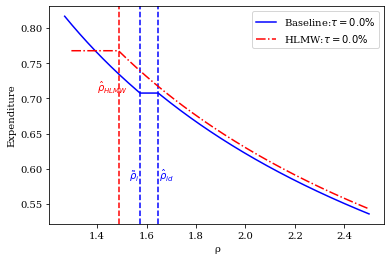

In [26]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(ρ_grid, ρq, color='blue', label="Baseline:" r"$\tau=0.0\%$")
#plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='blue')
plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='blue')
plt.text(1.53, 0.585, r"$\tilde{\rho}_{i}$",color='blue')
plt.axvline(model.ρ_hat_id_func(z,i), linestyle='--', color='blue')
plt.text(1.65, 0.585, r"$\hat{\rho}_{id}$", color='blue')
plt.plot(ρ_grid_hlmw, ρq_hlmw, '-.', color='red', label="HLMW:" r"$\tau=0.0\%$")
#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='orange')
plt.axvline(model_hlmw.ρ_hat_func(z_hlmw), linestyle='--', color='red')
plt.text(1.40, 0.71, r"$\hat{\rho}_{HLMW}$", color='red')
plt.ylabel('Expenditure')
plt.xlabel('ρ')
plt.legend()
plt.savefig("Figure_1_a.png", bbox_inches='tight', pad_inches=0.05)
plt.show()


#tikzplotlib.save("klln_hlmw_expenditure.tex")
#tikzplotlib.save("klln_hlmw_expenditure.pgf")


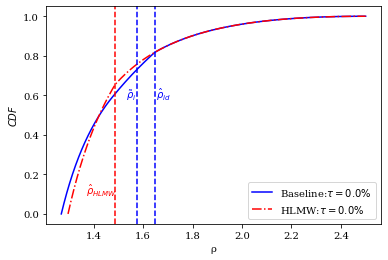

In [27]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(ρ_grid, F, color='blue', label="Baseline:" r"$\tau=0.0\%$")
#plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='blue')
plt.plot(ρ_grid_hlmw, F_hlmw, '-.', color='red', label="HLMW:" r"$\tau=0.0\%$")
#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='red')

plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='blue')
plt.text(1.53, 0.585, r"$\tilde{\rho}_{i}$",color='blue')
plt.axvline(model.ρ_hat_id_func(z,i), linestyle='--', color='blue')
#plt.text(1.97, -0.03, r"$\hat{\rho}$", color='blue')
plt.text(1.65, 0.585, r"$\hat{\rho}_{id}$", color='blue')
#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='orange')
plt.axvline(model_hlmw.ρ_hat_func(z_hlmw), linestyle='--', color='red')
plt.text(1.37, 0.1, r"$\hat{\rho}_{HLMW}$", color='red')

plt.ylabel(r"$CDF$")
plt.xlabel("ρ")
plt.legend()
plt.savefig("Figure_1_b.png", bbox_inches='tight', pad_inches=0.05)

plt.show()


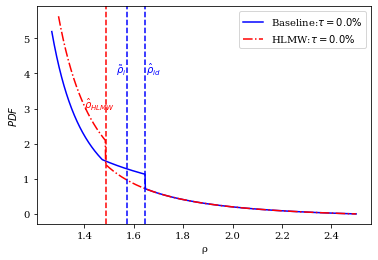

In [28]:
#plt.style.use(style='default')
plt.figure(facecolor='white')
plt.plot(ρ_grid, dF, color='blue', label="Baseline:" r"$\tau=0.0\%$")
#plt.axvline(model.ρ_min_func(z, i, τ), linestyle='--', color='blue')
plt.plot(ρ_grid_hlmw, dF_hlmw, '-.', color='red', label="HLMW:" r"$\tau=0.0\%$")
#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='red')

plt.axvline(model.ρ_tilde_func(z, i), linestyle='--', color='blue')
plt.text(1.53, 4, r"$\tilde{\rho}_{i}$",color='blue')
plt.axvline(model.ρ_hat_id_func(z,i), linestyle='--', color='blue')
plt.text(1.65, 4, r"$\hat{\rho}_{id}$", color='blue')

#plt.axvline(model_hlmw.ρ_min_func(z_hlmw, τ), linestyle='--', color='orange')
plt.axvline(model_hlmw.ρ_hat_func(z_hlmw), linestyle='--', color='red')
plt.text(1.40, 3.0, r"$\hat{\rho}_{HLMW}$", color='red')

plt.ylabel(r"$PDF$")
plt.xlabel("ρ")
plt.legend()
plt.savefig("Figure_1_c.png", bbox_inches='tight', pad_inches=0.05)
#plt.xlim(1,1.1)
plt.show()
